# **Séries temporais - A2**

**Grupo:**

- Amanda Perez
- Eduardo Adame
- Juan Belieni
- Kayo Yokoyama
- Lucas Westfal


# INSTRUÇÕES

Prezados alunos,

Conforme discutimos na aula passada, sugiro a divisão da turma em 6 grupos de aproximadamente 5 pessoas cada. Fiquem a vontade para dividir os grupos entre vocês e peço que cada grupo escolha um representante para me mandar um email com os nomes dos membros do grupo.

A primeira tarefa será reproduzir em python as seguintes seções que constam no arquivo de notas computacionais:

- ACF
- Simple forecasting methods to use as baseline

A entrega inicial será um arquivo .ipynb com o código reproduzindo as seções. Podem usar os mesmos conjuntos de dados na reprodução. Podemos discutir prazo e tirar dúvidas na nossa próxima aula do dia 25/10 (quarta-feira). Lembrando que não teremos aula na próxima segunda-feira (23/10). Usem esse tempo livre para dividir os grupos e começarem a desenvolver essa primeira tarefa.

Abs,

Thiago


# ACF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Generating and plotting white noise data

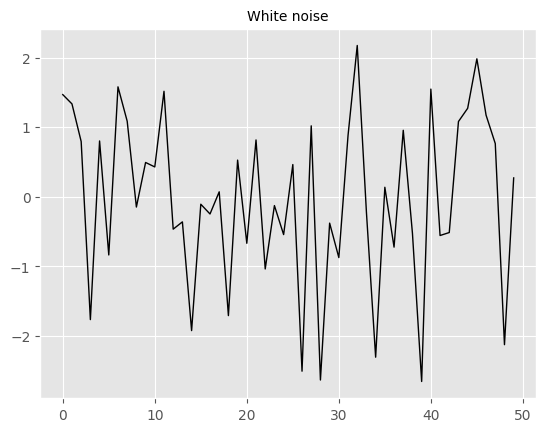

In [ ]:
mean = 0
std = 1
num_samples = 50
samples = np.random.normal(mean, std, size=num_samples)

plt.style.use('ggplot')
plt.plot(samples, color='black', linewidth=1)
plt.title("White noise", size=10)
plt.show()

Text(0.5, 1.0, 'White noise')

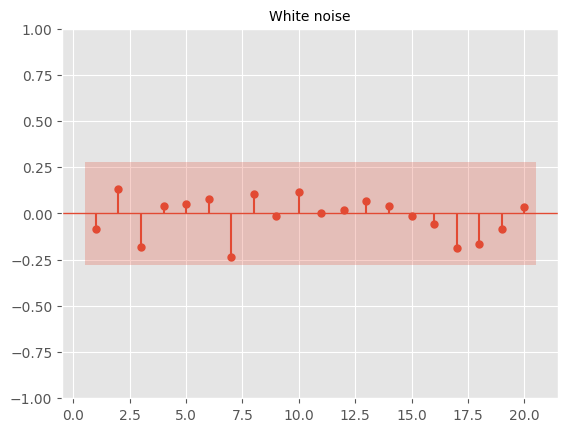

In [ ]:
#from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf  # not sure if it will be used

plt.style.use('ggplot')
fig, ax = plt.subplots(1)

plot = plot_acf(samples,
                alpha=0.05,
                ax = ax,
                zero=False,
                lags=20,
                title=None,
                bartlett_confint=False,
                # color='darkblue',
                # vlines_kwargs={"colors": 'darkblue'},
                linewidth=1)
ax.set_title('White noise', size=10)

Aqui nao sei como faz pra plotar aquelas retas pontilhadas do plot do R
de fato nem sei o que é aquilo direito

# Simple forecasting methods to use as baseline

In [293]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [294]:
df = pd.read_csv('data_aus.csv').set_index("qtr")
df.index = df.index.str.replace(r'(\d+) (Q\d)', r'\1-\2')
df.head()

<ipython-input-294-9a1b7f56d60a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace(r'(\d+) (Q\d)', r'\1-\2')


,Beer,Bricks
qtr,,
1956-Q1,284.0,189.0
1956-Q2,213.0,204.0
1956-Q3,227.0,208.0
1956-Q4,308.0,197.0
1957-Q1,262.0,187.0


In [295]:
bricks = df[(df.index >= "1970-Q1") & (df.index <= "2004-Q4")]
bricks = bricks["Bricks"]
bricks.head()

qtr
1970-Q1    386.0
1970-Q2    428.0
1970-Q3    434.0
1970-Q4    417.0
1971-Q1    385.0
Name: Bricks, dtype: float64

In [296]:
def plot_forecast(model, data):
    forecast = model.get_forecast(steps=8).summary_frame(alpha=0.05)

    plt.figure(figsize=(12, 6))
    plt.plot(
        pd.PeriodIndex(data.index, freq='Q').to_timestamp(),
        data.values,
        label="Actual",
        color="black"
    )
    plt.plot(
        pd.PeriodIndex(model.fittedvalues.index, freq='Q').to_timestamp(),
        model.fittedvalues,
        label="Forecast",
        color="blue",
        linestyle="--"
    )

    plt.plot(forecast.index, forecast[['mean']], color="blue")
    plt.fill_between(
        forecast.index,
        forecast['mean_ci_lower'],
        forecast['mean_ci_upper'],
        color="#0000AA44"
    )

    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


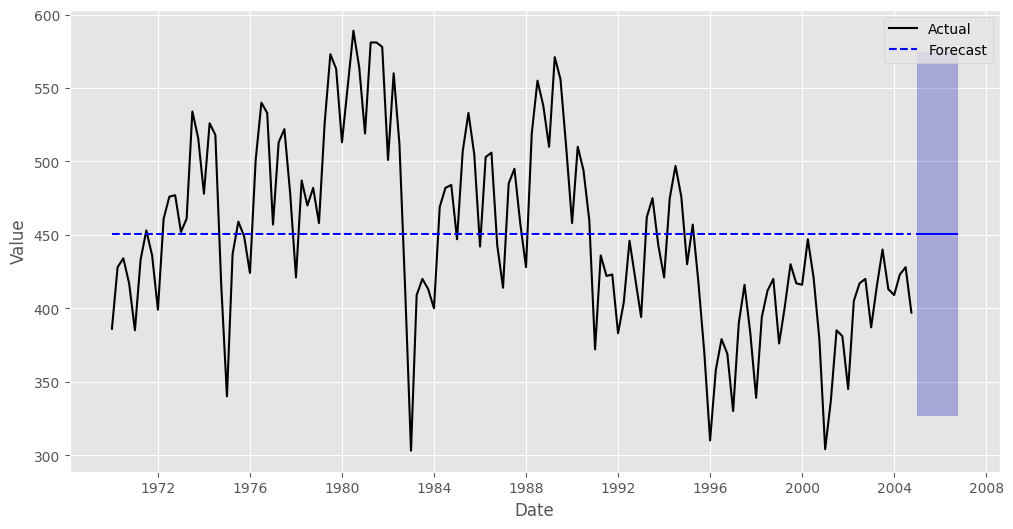

In [ ]:
mean_model = sm.tsa.ARIMA(bricks, order=(0, 0, 0))
mean_model = mean_model.fit()

plot_forecast(mean_model, bricks)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


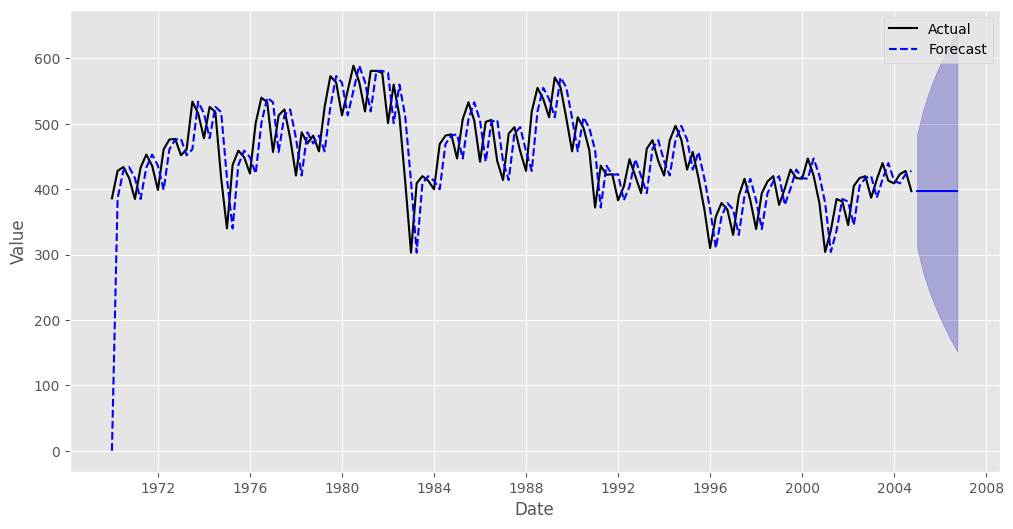

In [297]:
naive_model = sm.tsa.ARIMA(bricks, order=(0, 1, 0))
naive_model = naive_model.fit()

plot_forecast(naive_model, bricks)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


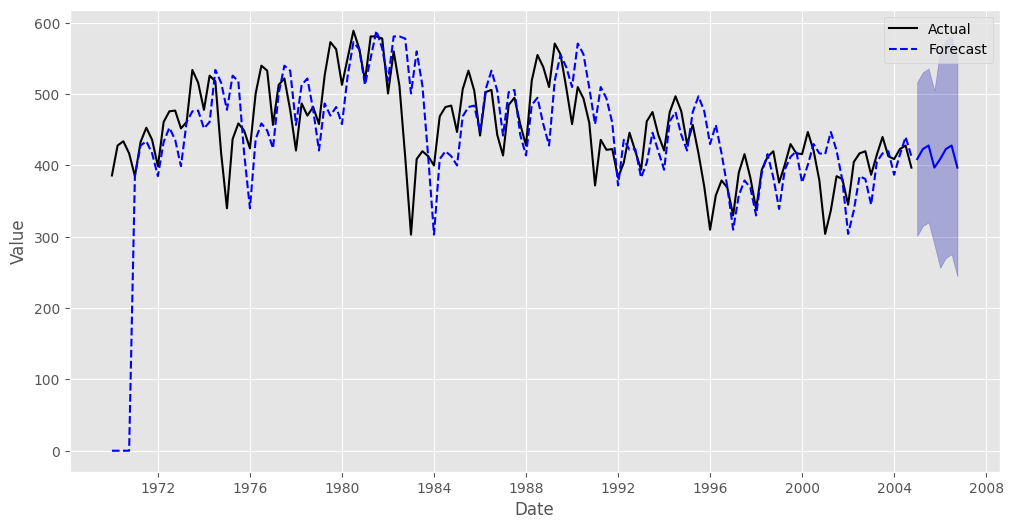

In [298]:
snaive_model = sm.tsa.SARIMAX(bricks, order=(0, 0, 0), seasonal_order=(0, 1, 0, 4))
snaive_model = snaive_model.fit()

plot_forecast(snaive_model, bricks)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


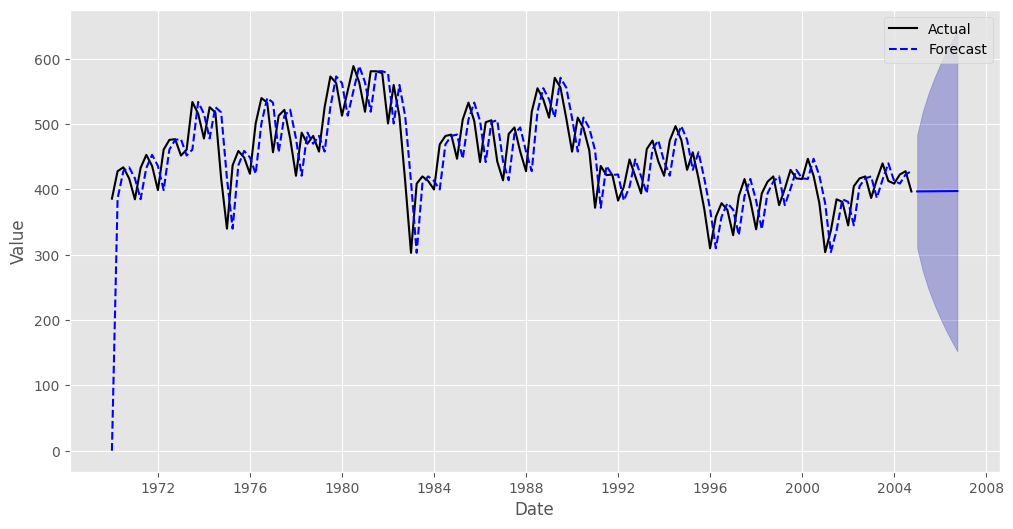

In [299]:
drift_model = sm.tsa.ARIMA(bricks, order=(0, 1, 0), trend='t')
drift_model = drift_model.fit()

plot_forecast(drift_model, bricks)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


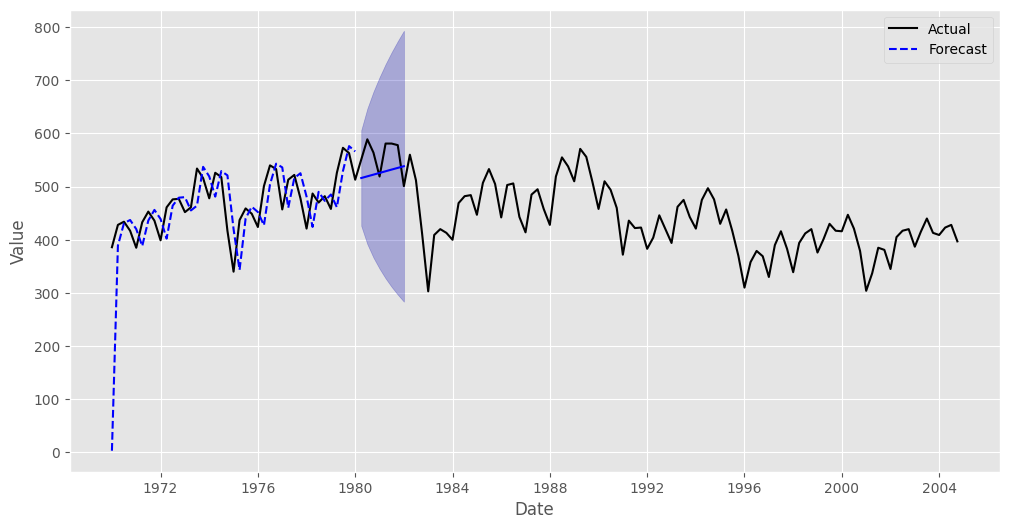

In [300]:
drift_model_1970_1980 = sm.tsa.ARIMA(bricks[bricks.index <= "1980-Q1"], order=(0, 1, 0), trend="t")
drift_model_1970_1980 = drift_model_1970_1980.fit()

plot_forecast(drift_model_1970_1980, bricks)

### Example: Australian quarterly beer production

In [301]:
train = df[(df.index >= "1992-Q1") & (df.index <= "2006-Q4")]
train = train[["Beer"]]

pd.concat([train.head(), train.tail()])

,Beer
qtr,
1992-Q1,443.0
1992-Q2,410.0
1992-Q3,420.0
1992-Q4,532.0
1993-Q1,433.0
2005-Q4,482.0
2006-Q1,438.0
2006-Q2,386.0
2006-Q3,405.0


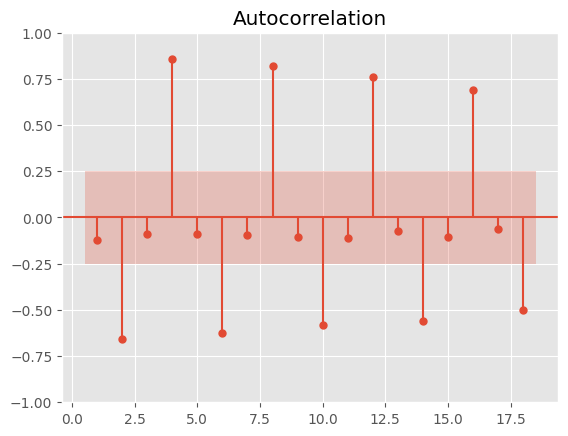

In [302]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train, bartlett_confint=False, zero=False)
plt.show()

In [303]:
beer_mean_model = sm.tsa.ARIMA(train, order=(0, 0, 0))
beer_mean_model = beer_mean_model.fit()

beer_naive_model = sm.tsa.ARIMA(train, order=(0, 1, 0))
beer_naive_model = beer_naive_model.fit()

beer_snaive_model = sm.tsa.SARIMAX(train, order=(0, 0, 0), seasonal_order=(0, 1, 0, 4))
beer_snaive_model = beer_snaive_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be use

In [304]:
fc = pd.concat([
    beer_mean_model.forecast(14),
    beer_naive_model.forecast(14),
    beer_snaive_model.forecast(14),
], axis=1)

fc.columns = ['mean', 'naive', 'snaive']

fc.head()

,mean,naive,snaive
2007-01-01,436.449995,491.0,438.0
2007-04-01,436.449995,491.0,386.0
2007-07-01,436.449995,491.0,405.0
2007-10-01,436.449995,491.0,491.0
2008-01-01,436.449995,491.0,438.0


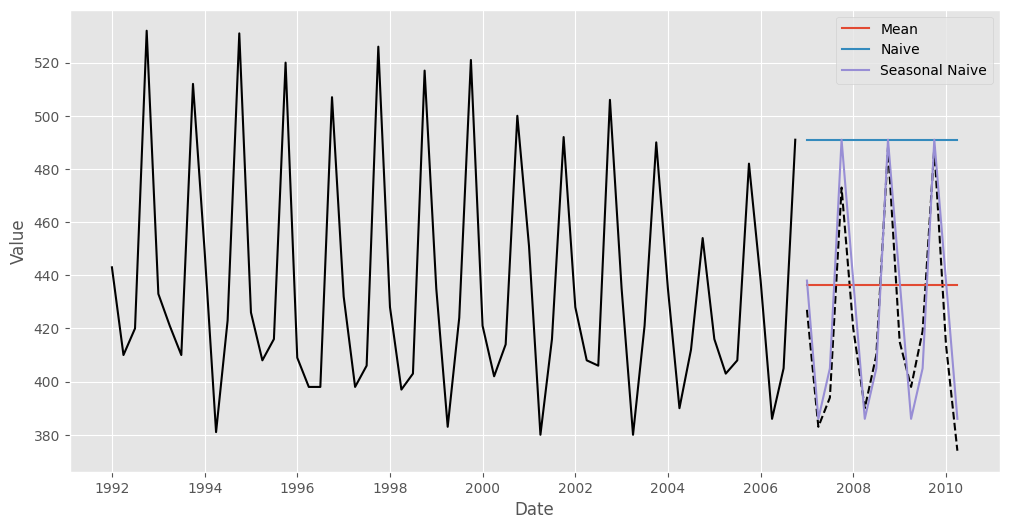

In [305]:
test = df[(df.index >= "2007 Q1")]

train_timestamp = pd.PeriodIndex(train.index, freq='Q').to_timestamp()
test_timestamp = pd.PeriodIndex(test.index, freq='Q').to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(train_timestamp, train.values, color="black")
plt.plot(test_timestamp, test['Beer'].values, color="black",  linestyle="--")

plt.plot(fc.index, fc[["mean"]], label="Mean")
plt.plot(fc.index, fc[["naive"]], label="Naive")
plt.plot(fc.index, fc[["snaive"]], label="Seasonal Naive")

plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### Example: Google's daily closing stock price


In [ ]:
google_stock = pd.read_csv('data_google.csv')
google_stock = google_stock.loc[ : , google_stock.columns!=google_stock.columns[0]]
google_stock.head()

,Symbol,Open,High,Low,Close,Adj_Close,Volume,day,date
0,GOOG,526.114746,528.362366,521.231628,521.937744,521.937744,1447600.0,1,2015-01-02
1,GOOG,520.396240,521.460388,510.252045,511.057617,511.057617,2059800.0,2,2015-01-05
2,GOOG,512.181458,513.350037,498.307800,499.212799,499.212799,2899900.0,3,2015-01-06
3,GOOG,504.225220,504.467896,496.915436,498.357513,498.357513,2065100.0,4,2015-01-07
4,GOOG,495.264526,500.724487,488.312805,499.928864,499.928864,3353600.0,5,2015-01-08


In [ ]:
google_stock['year'] = google_stock['date'].apply(lambda x: int(x.split('-')[0]))
google_stock['month'] = google_stock['date'].apply(lambda x: int(x.split('-')[1]))
google_stock['day_of_month'] = google_stock['date'].apply(lambda x: int(x.split('-')[2]))

In [ ]:
google_stock['date'] = google_stock['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
google_stock.head()

,Symbol,Open,High,Low,Close,Adj_Close,Volume,day,date,year,month,day_of_month
0,GOOG,526.114746,528.362366,521.231628,521.937744,521.937744,1447600.0,1,2015-01-02,2015,1,2
1,GOOG,520.396240,521.460388,510.252045,511.057617,511.057617,2059800.0,2,2015-01-05,2015,1,5
2,GOOG,512.181458,513.350037,498.307800,499.212799,499.212799,2899900.0,3,2015-01-06,2015,1,6
3,GOOG,504.225220,504.467896,496.915436,498.357513,498.357513,2065100.0,4,2015-01-07,2015,1,7
4,GOOG,495.264526,500.724487,488.312805,499.928864,499.928864,3353600.0,5,2015-01-08,2015,1,8


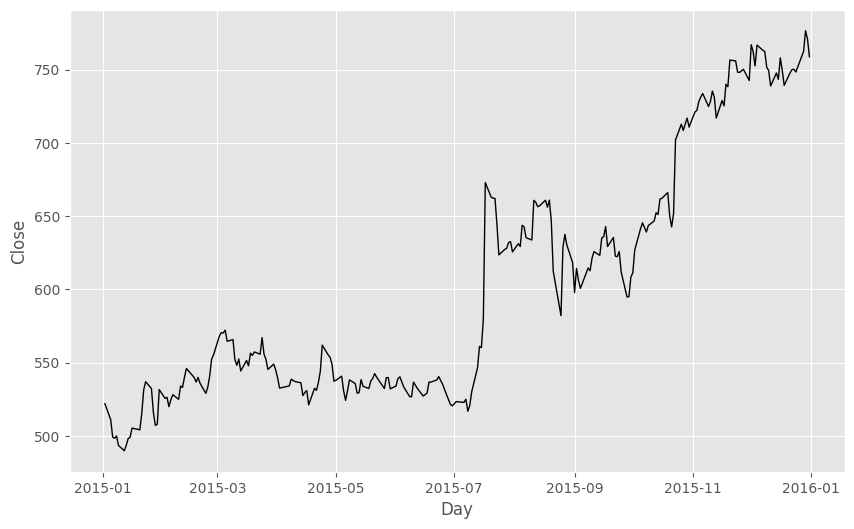

In [ ]:
# Plotting 2015 data
google_2015 = google_stock[google_stock['year'] == 2015]

plt.figure(figsize=(10,6))
plt.plot(google_2015['date'], google_2015['Close'], color='black', lw=1)
plt.xlabel('Day')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'ACF Google stock (2015)')

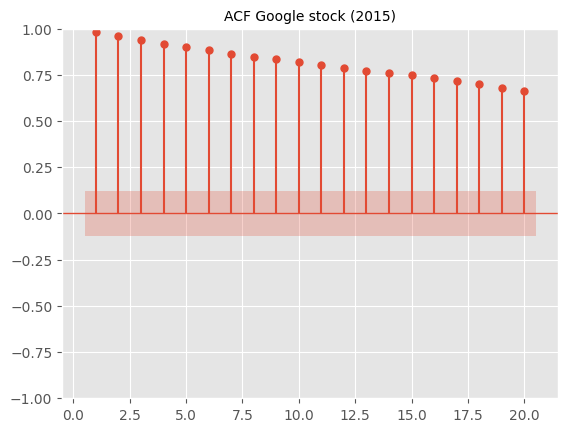

In [ ]:
# plotting ACF
plt.style.use('ggplot')
fig, ax = plt.subplots(1)

plot = plot_acf(google_2015['Close'],
                alpha=0.05,
                ax = ax,
                zero=False,
                lags=20,
                title=None,
                bartlett_confint=False,
                linewidth=1)
ax.set_title('ACF Google stock (2015)', size=10)

In [ ]:
google_jan_2016 = google_stock[google_stock['year'] == 2016][google_stock['month'] == 1]

<ipython-input-76-bf9bec5a1ad9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  google_jan_2016 = google_stock[google_stock['year'] == 2016][google_stock['month'] == 1]


In [ ]:
train_google = google_2015.set_index(google_2015['date'])['Close']
train_google

date
2015-01-02    521.937744
2015-01-05    511.057617
2015-01-06    499.212799
2015-01-07    498.357513
2015-01-08    499.928864
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 252, dtype: float64

In [ ]:
google_mean_model = sm.tsa.ARIMA(train_google, order=(0, 0, 0))
google_mean_model = google_mean_model.fit()

google_naive_model = sm.tsa.ARIMA(train_google, order=(0, 1, 0))
google_naive_model = google_naive_model.fit()

google_drift_model =  sm.tsa.ARIMA(train_google, order=(0, 1, 0), trend='t')
google_drift_model =  google_drift_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
n = google_jan_2016['date'].shape[0]
google_fc = pd.concat([google_mean_model.forecast(n),
                       google_naive_model.forecast(n),
                       google_drift_model.forecast(n),
                       ], axis=1)

google_fc.columns = ['mean', 'naive', 'drift']

google_fc.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,mean,naive,drift
252,601.550524,758.880005,759.823993
253,601.550524,758.880005,760.767981
254,601.550524,758.880005,761.711969
255,601.550524,758.880005,762.655957
256,601.550524,758.880005,763.599946


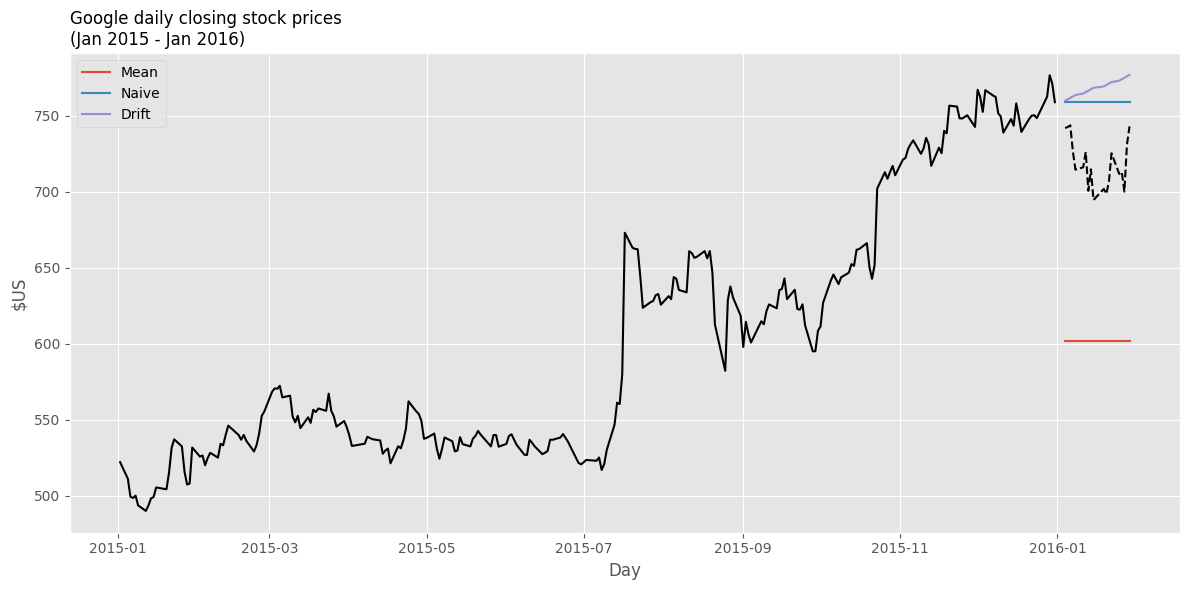

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(google_2015['date'], google_2015['Close'], color="black")
plt.plot(google_jan_2016['date'], google_jan_2016['Close'], color="black", linestyle="--")

plt.plot(google_jan_2016['date'], google_fc[["mean"]], label="Mean")
plt.plot(google_jan_2016['date'], google_fc[["naive"]], label="Naive")
plt.plot(google_jan_2016['date'], google_fc[["drift"]], label="Drift")

plt.title('Google daily closing stock prices\n(Jan 2015 - Jan 2016)', size=12, loc='left')
plt.xlabel("Day")
plt.ylabel("$US")
plt.legend()
plt.tight_layout()
plt.show()